# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline

warnings.filterwarnings("ignore")

df=pd.read_csv('Profissao- Cientista de Dados_M10_support material.csv')
df

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             15000 non-null  int64         
 1   data_ref               15000 non-null  datetime64[ns]
 2   index                  15000 non-null  int64         
 3   sexo                   15000 non-null  object        
 4   posse_de_veiculo       15000 non-null  bool          
 5   posse_de_imovel        15000 non-null  bool          
 6   qtd_filhos             15000 non-null  int64         
 7   tipo_renda             15000 non-null  object        
 8   educacao               15000 non-null  object        
 9   estado_civil           15000 non-null  object        
 10  tipo_residencia        15000 non-null  object        
 11  idade                  15000 non-null  int64         
 12  tempo_emprego          12466 non-null  float64       
 13  q

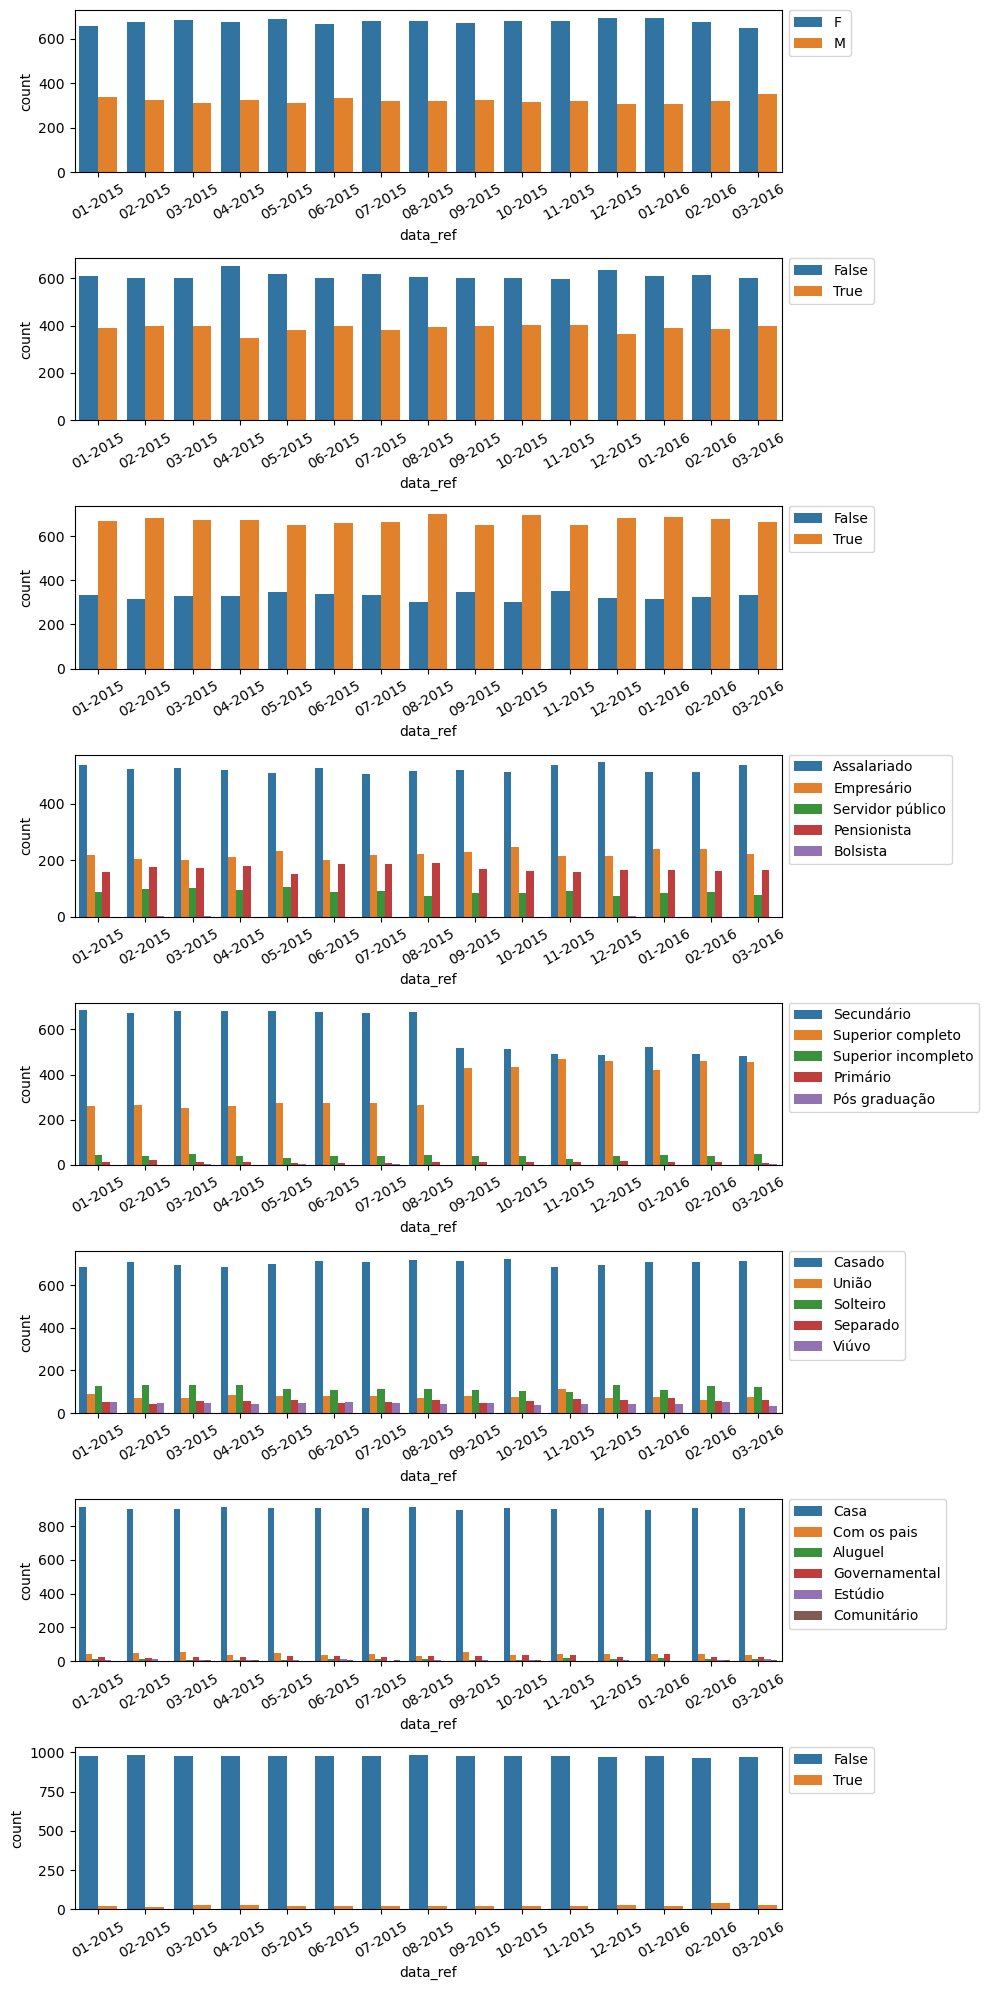

In [73]:
qualitativas=['sexo','posse_de_veiculo','posse_de_imovel','tipo_renda','educacao','estado_civil','tipo_residencia','mau']

df['data_ref'] = pd.to_datetime(df['data_ref'])
tick_labs = df['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

fig, ax = plt.subplots(len(qualitativas),1, figsize=(10,20))

for i , var in enumerate(qualitativas):
    
    sns.countplot(x='data_ref',  hue = var, data=df, ax=ax[i])

    ticks = ax[i].set_xticks(list(range(df['data_ref'].nunique())))
    labels = ax[i].set_xticklabels(tick_labs,rotation=30)
    ax[i].legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0)

plt.tight_layout()
plt.show()

As variáveis se mantêm estáveis com exceção da variável educação onde seus elementos superior completo aumenta em valor e o elemento secundário diminui.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

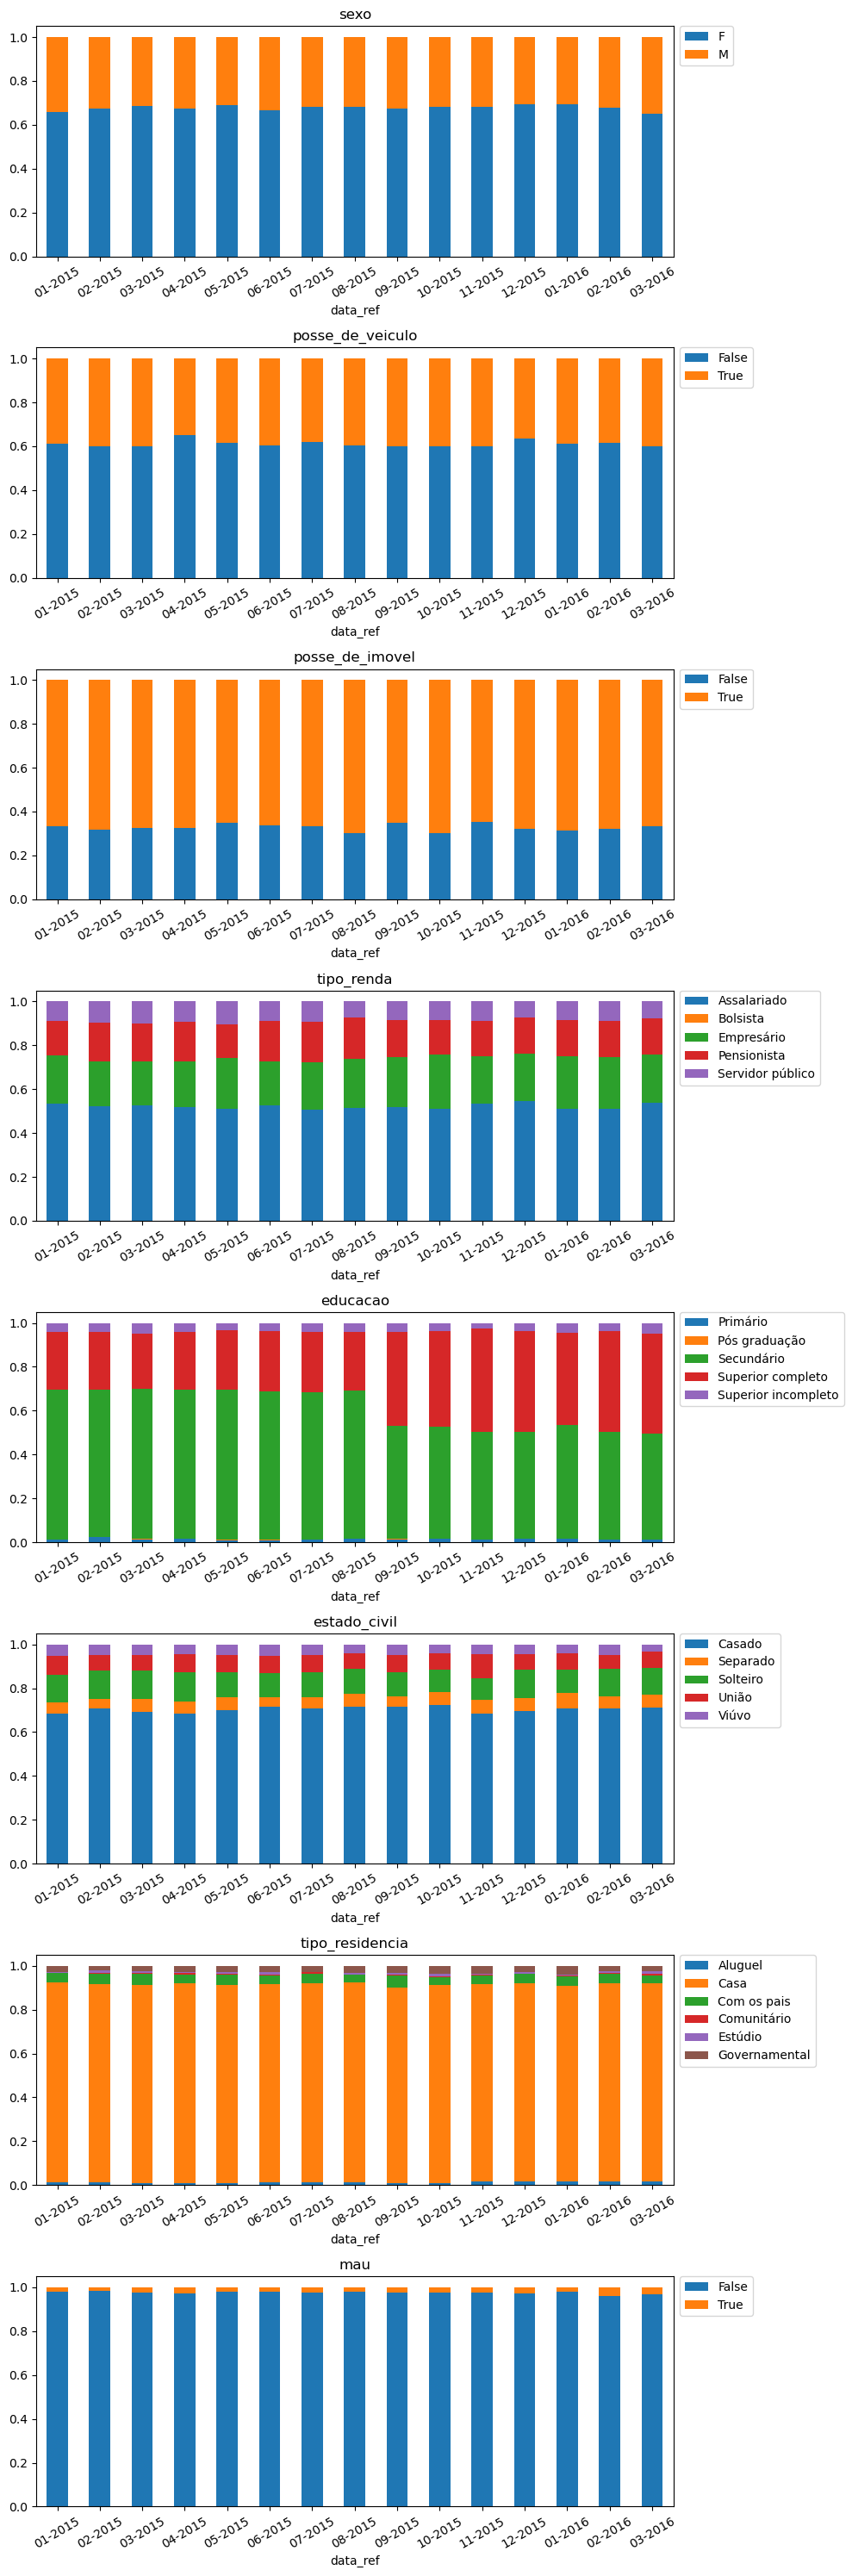

In [72]:
fig, ax = plt.subplots(len(qualitativas),1, figsize=(10,30))

for i , var in enumerate(qualitativas):
    
    tab_freq = pd.crosstab(df['data_ref'],df[var])
    tab = tab_freq.div(tab_freq.sum(axis = 1), axis = 0)

    ax[i] = tab.plot.bar(stacked = True, ax=ax[i])

    tick_labs = df['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
    ax[i].set_xticklabels(tick_labs, rotation=30)
    ax[i].set_title(var)
    ax[i].legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0)
    
plt.tight_layout()
plt.show()

As médias se mantêm estáveis com exceção da variável educação onde seus elementos possuem uma pequena variação. Pode-se utilizar todas as variáveis para modelagem.
